<a href="https://colab.research.google.com/github/alex06733/Elektro/blob/main/Interpolation%20PWM%20zzu%20Spannung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

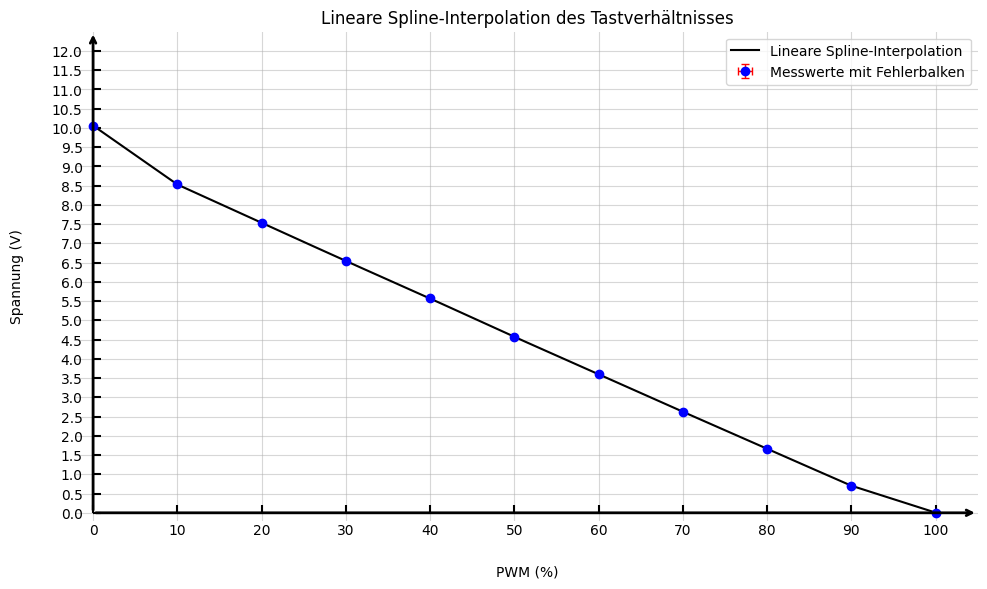

   x_start  x_end        m        b
0      0.0   10.0 -0.15310  10.0620
1     10.0   20.0 -0.09960   9.5270
2     20.0   30.0 -0.09910   9.5170
3     30.0   40.0 -0.09740   9.4660
4     40.0   50.0 -0.09970   9.5580
5     50.0   60.0 -0.09740   9.4430
6     60.0   70.0 -0.09720   9.4310
7     70.0   80.0 -0.09640   9.3750
8     80.0   90.0 -0.09580   9.3270
9     90.0  100.0 -0.06994   6.9996


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator

# ----------------------
# 1) Daten & Fehlerbalken
# ----------------------
pwm = np.array([0.0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # PWM in %
voltage = np.array([
    10.062, 8.531, 7.535, 6.544, 5.57,
    4.573, 3.599, 2.627, 1.663, 0.705, 0.0056
])  # Spannung in V

# Fehlerbalken: 0,02% der Spannung und 0,1% der PWM
voltage_error = 0.0002 * voltage
pwm_error = 0.001 * pwm

# ----------------------
# 2) Lineare Interpolation
# ----------------------
linear_spline = interp1d(pwm, voltage, kind='linear')
pwm_fine = np.linspace(0, 100, 500)  # Feinere PWM-Werte
voltage_spline_fit = linear_spline(pwm_fine)

# ----------------------
# 3) Figur & Grund-Layout
# ----------------------
plt.figure(figsize=(10, 6))

# Wichtig: Ticks manuell setzen
# Keine negativen Y-Ticks; wir fangen bei 0 an und hören bei 12 auf
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 12.1, 0.5))  # 0, 0.5, 1.0, ..., 12.0

# ----------------------
# 4) Messwerte mit Fehlerbalken
# ----------------------
plt.errorbar(
    pwm,
    voltage,
    xerr=pwm_error,
    yerr=voltage_error,
    fmt='o',
    ecolor='red',
    elinewidth=1,
    capsize=3,
    label="Messwerte mit Fehlerbalken",
    color="blue"
)

# ----------------------
# 5) Lineare Spline-Kurve
# ----------------------
plt.plot(pwm_fine, voltage_spline_fit, label="Lineare Spline-Interpolation", color="black")

# Achsentitel, Plot-Titel, Legende, Gitter
plt.xlabel("PWM (%)", labelpad=20)
plt.ylabel("Spannung (V)", labelpad=20)
plt.title("Lineare Spline-Interpolation des Tastverhältnisses")
plt.legend()
plt.grid(zorder=0, alpha=0.5)

# ----------------------
# 6) Pfeile statt Standard-Achsen
# ----------------------
# Pfeil für x-Achse (bis x=105, etwas über 100 für den Pfeilkopf)
plt.annotate(
    '',
    xy=(105, 0),
    xytext=(0, 0),
    arrowprops=dict(arrowstyle='->', color='black', lw=2),
    zorder=10
)

# Pfeil für y-Achse (bis y=12.5, damit er über den letzten Tick hinausragt)
plt.annotate(
    '',
    xy=(0, 12.5),
    xytext=(0, 0),
    arrowprops=dict(arrowstyle='->', color='black', lw=2),
    zorder=10
)

# ----------------------
# 7) Achsen-Spines anpassen
# ----------------------
ax = plt.gca()

# Obere und rechte Achsenlinie ausblenden
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Linke (y-)Achse bei x=0 anzeigen
ax.spines['left'].set_position(('data', 0))
ax.spines['left'].set_visible(True)

# Nur von y=0 bis y=12 die Spine zeichnen
ax.spines['left'].set_bounds(0, 12)

# Untere (x-)Achse bei y=0 (Pfeil statt Achsenlinie)
ax.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['bottom'].set_bounds(0, 100)

# ----------------------
# 8) Achsenlimits
# ----------------------
# A) x bis 105 (für Pfeil) und links etwas Luft, damit x=0-Punkt ganz zu sehen ist
ax.set_xlim(-2, 105)

# B) y beginnt bei -0.2, damit der Marker bei y=0 komplett über der Achsenlinie liegt
#    Aber die Ticks starten erst bei 0 (siehe plt.yticks(...) oben), also keine negativen Beschriftungen
ax.set_ylim(-0.2, 12.5)

# ----------------------
# 9) Tick-Design
# ----------------------
ax.tick_params(axis='y', direction='in', length=6, width=1.5, colors='black', grid_alpha=0.5, pad=7.5)
ax.tick_params(axis='x', direction='in', length=6, width=1.5, colors='black', grid_alpha=0.5, pad=7.5)

# Falls man lieber noch feiner einstellen möchte (MultipleLocator etc.):
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
# ax.yaxis.set_ticks_position('left')

# Layout anpassen & Plot anzeigen
plt.tight_layout()
plt.show()

# ----------------------
# 10) Stückweise lineare Koeffizienten ausgeben
# ----------------------
m_values = (voltage[1:] - voltage[:-1]) / (pwm[1:] - pwm[:-1])
b_values = voltage[:-1] - m_values * pwm[:-1]

coefficients = pd.DataFrame({
    "x_start": pwm[:-1],
    "x_end":   pwm[1:],
    "m":       m_values,
    "b":       b_values,
})

print(coefficients)
